# Cleaning and Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
def get_unique_values(df):
    for i in df.columns:
        print(i,set(np.unique(df[i])),'\n')
        
def type_(x):
    if len(x) == 0:
        t = 'Numerical'
    elif len(x) == 2:
        t = 'Binary Categorical'
    else:
        t = 'Categorical' 
    return t


################################################################# Data Dictionary For Housing Data


housing_dict = pd.read_csv('./data/data_description.txt',
                   sep="\n|:",
                   header=None,
                   engine='python')

housing_dict.columns = ['var','descr']

new_housing_dict = housing_dict.loc[~housing_dict['descr'].isnull()]

new_housing_dict.loc[0:,'index_'] = new_housing_dict.index

idx = new_housing_dict['index_'].to_numpy()
i = 0
indx_outcomes = []
while (i < len(idx)-1):
    indx_outcomes.append(np.arange(idx[i]+1,idx[i+1]))
    i += 1

associated_outcomes = []
for j in indx_outcomes:
    associated_outcomes.append(housing_dict[['var']].loc[j].to_numpy())
    
associated_outcomes.append(np.array([])) #append an empty array to fix length issue

associated_outcomes = pd.Series(associated_outcomes).\
                        apply(lambda outcome_set: [i[0] for i in outcome_set]).to_numpy()



new_housing_dict.loc[0:,'associated_outcomes'] = associated_outcomes
new_housing_dict = new_housing_dict.reset_index()
new_housing_dict = new_housing_dict.drop(['index','index_'], axis = 1)


types = [type_(elem) for elem in new_housing_dict['associated_outcomes']]
new_housing_dict.loc[0:,'Variable Type'] = types

housing_dict = new_housing_dict

def ghd():
    return(housing_dict.sort_values(by = "var"))

# Reading in Housing Data

In [3]:
housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv')
housing.rename(columns = {'PID':'MapRefNo'}, inplace = True) # renaming to later merge res and housing on this column
housing = housing.drop('Unnamed: 0', axis = 1)
housing.shape

(2580, 81)

In [4]:
housing.head()

MapRefNo  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
0  909176150        856     126000          30       RL          NaN     7890   
1  905476230       1049     139500         120       RL         42.0     4235   
2  911128020       1001     124900          30  C (all)         60.0     6060   
3  535377150       1039     114000          70       RL         80.0     8146   
4  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
1   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
3   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
4   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0        SWISU       Norm       Norm     1Fam     1Story            6   
1      Edwards       Norm       Norm   TwnhsE     1Story            5   
2       IDOTRR       Norm       Norm     1Fam     1Story            5   
3      OldTown       Norm       Norm     1Fam     2Story            4   
4       NWAmes       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            6       1939          1950     Gable  CompShg     Wd Sdng   
1            5       1984          1984     Gable  CompShg     HdBoard   
2            9       1930          2007       Hip  CompShg     MetalSd   
3            8       1900          2003     Gable  CompShg     MetalSd   
4            6       2001          2001     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     Wd Sdng       None         0.0        TA        TA     CBlock       TA   
1     HdBoard    BrkFace       149.0        Gd        TA     CBlock       Gd   
2     MetalSd       None         0.0        Gd        TA     BrkTil       TA   
3     MetalSd       None         0.0        Gd        Gd     BrkTil       Fa   
4     VinylSd       None         0.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          Rec       238.0          Unf         0.0   
1       TA           Mn          GLQ       552.0          ALQ       393.0   
2       TA           No          ALQ       737.0          Unf         0.0   
3       TA           No          Unf         0.0          Unf         0.0   
4       TA           No          GLQ       643.0          Unf         0.0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0      618.0        856.0    GasA        TA          Y      SBrkr       856   
1      104.0       1049.0    GasA        TA          Y      SBrkr      1049   
2      100.0        837.0    GasA        Ex          Y      SBrkr      1001   
3      405.0        405.0    GasA        Gd          Y      SBrkr       717   
4      167.0        810.0    GasA        Ex          Y      SBrkr       810   

   2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0         0             0           1.0           0.0         1         0   
1         0             0           1.0           0.0         2         0   
2         0             0           0.0           0.0         1         0   
3       322             0           0.0           0.0         1         0   
4       855             0           1.0           0.0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             4        Typ   
1             2             1          Gd             5        Typ   
2             2             1          Gd             5        Typ   
3             2             1          TA             6 

# Reading in Real Estate Data

In [5]:
res = pd.read_csv('./data/Ames_Real_Estate_Data.csv')
res.shape

dd_res = pd.read_excel('./data/Tbl_DataExportSpec.xls')
dd_res.shape

(100, 7)

## **Note: res columns (36,40,81,87) have mixed data types**

In [6]:
import copy

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split

In [7]:
data = housing.copy()
Y = data['SalePrice']
X = data.drop('SalePrice', axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = .2, random_state = 0)


X_train.loc[:,'SalePrice'] = y_train
X_test.loc[:,'SalePrice'] = y_test

test = X_test.copy()
test.head()

MapRefNo  GrLivArea  MSSubClass MSZoning  LotFrontage  LotArea Street  \
953  535151110       1053          20       RL         60.0     8250   Pave   
330  908103280       1127          20       RL         65.0     6500   Pave   
670  911128180       1128          50  C (all)         60.0     7500   Pave   
302  528427020       1468          20       RL         74.0     9612   Pave   
436  905107140       1285          20       RL         71.0     8197   Pave   

    Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
953   NaN      Reg         Lvl    AllPub    Corner       Gtl        NAmes   
330   NaN      Reg         Lvl    AllPub    Inside       Gtl      Edwards   
670   NaN      Reg         Lvl    AllPub    Inside       Gtl       IDOTRR   
302   NaN      Reg         Lvl    AllPub    Inside       Gtl      Somerst   
436   NaN      Reg         Lvl    AllPub    Inside       Gtl       Sawyer   

    Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
953       Norm       Norm     1Fam     1Story            5            7   
330       Norm       Norm     1Fam     1Story            6            6   
670       Norm       Norm     1Fam     1.5Fin            4            4   
302      Feedr       Norm     1Fam     1Story            8            5   
436       Norm       Norm     1Fam     1Story            6            5   

     YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
953       1963          1963     Gable  CompShg     MetalSd     MetalSd   
330       1976          1976       Hip  CompShg     HdBoard     Plywood   
670       1920          1950     Gable  CompShg     MetalSd     MetalSd   
302       2008          2009     Gable  CompShg     VinylSd     VinylSd   
436       1977          1977     Gable  CompShg     Plywood     Plywood   

    MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
953       None         0.0        TA        TA     CBlock       TA       TA   
330    BrkFace        84.0        TA        TA     CBlock       TA       Ex   
670       None         0.0        TA        Gd     CBlock       TA       TA   
302      Stone        72.0        Gd        TA      PConc       Gd       TA   
436    BrkFace       148.0        TA        TA     CBlock       TA       TA   

    BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
953           No          ALQ       288.0          Unf         0.0      765.0   
330           No          BLQ      1033.0          Unf         0.0       94.0   
670           No          Unf         0.0          Unf         0.0      698.0   
302           No          Unf         0.0          Unf         0.0     1468.0   
436           No          Unf         0.0          Unf         0.0      660.0   

     TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
953       1053.0    GasA        Gd          Y      SBrkr      1053         0   
330       1127.0    GasA        TA          Y      SBrkr      1127         0   
670        698.0    GasA        TA          Y      FuseA       698       430   
302       1468.0    GasA        Ex          Y      SBrkr      1468         0   
436        660.0    GasA        Ex          Y      SBrkr      1285         0   

     LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
953             0           1.0           0.0         1         0   
330             0           0.0           1.0         1         1   
670             0           0.0           0.0         1         0   
302             0           0.0           0.0         2         0   
436             0           0.0           0.0         1         1   

     BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
953             3             1          Gd             6        Typ   
330             3             1          TA             6        Typ   
670             2             1          TA             6        Typ   
302             3   

In [8]:
train = X_train.copy()
train.head()

MapRefNo  GrLivArea  MSSubClass MSZoning  LotFrontage  LotArea Street  \
2467  535351050       1363          20       RL         75.0    14559   Pave   
220   527325110       1969          60       RL         92.0    11952   Pave   
1101  908208020       1121          20       RM         80.0     8546   Pave   
17    909101060        864          30       RL         45.0     8248   Pave   
58    528365060       2418          60       RL         96.0    10542   Pave   

     Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
2467   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
220    NaN      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
1101   NaN      Reg         Lvl    AllPub    Corner       Gtl      Edwards   
17    Grvl      Reg         Lvl    AllPub    Inside       Gtl      Edwards   
58     NaN      Reg         Lvl    AllPub    Inside       Gtl      NoRidge   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
2467       Norm       Norm     1Fam     1Story            5            7   
220        PosA       Norm     1Fam     2Story            7            6   
1101       Norm       Norm     1Fam     1Story            4            5   
17         Norm       Norm     1Fam     1Story            3            3   
58         Norm       Norm     1Fam     2Story            7            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
2467       1951          2000       Hip  CompShg     Wd Sdng     Wd Sdng   
220        1977          1977   Mansard  WdShake     WdShing     Plywood   
1101       2003          2004     Gable  CompShg     VinylSd     VinylSd   
17         1914          1950     Gable  CompShg      Stucco      Stucco   
58         1993          1994       Hip  CompShg     Wd Sdng     ImStucc   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2467     BrkCmn        70.0        Gd        TA     CBlock       TA       TA   
220        None         0.0        TA        TA     CBlock       Gd       TA   
1101       None         0.0        TA        TA      PConc       Gd       TA   
17         None         0.0        TA        TA     BrkTil       TA       TA   
58      BrkFace       651.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2467           No          BLQ       650.0          Rec       180.0   
220            No          Unf         0.0          Unf         0.0   
1101           No          Unf         0.0          Unf         0.0   
17             No          BLQ        41.0          Unf         0.0   
58             Gd          GLQ      1173.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2467      178.0       1008.0    GasA        Ex          Y      SBrkr   
220       808.0        808.0    GasA        TA          Y      SBrkr   
1101     1121.0       1121.0    GasA        Ex          Y      SBrkr   
17        823.0        864.0    GasA        TA          N      FuseF   
58        138.0       1311.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
2467      1363         0             0           1.0           0.0         1   
220       1161       808             0           0.0           0.0         2   
1101      1121         0             0           0.0           0.0         2   
17         864         0             0           1.0           0.0         1   
58        1325      1093             0           1.0           0.0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
2467         0             2             1          TA             6   
220          1             3             1          TA             8   
1101         0             2             1          TA             5   
17           0             2     

# Dealing with Nulls

In [13]:
nan_counts_train = pd.DataFrame(train.isnull().sum()).T
nan_counts_train

MapRefNo  GrLivArea  MSSubClass  MSZoning  LotFrontage  LotArea  Street  \
0         0          0           0         0          384        0       0   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0   1927         0            0          0          0          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0             0           0           0         0           0            0   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0            0          0             0          0         0            0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0            0          11          11          0          0           0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0        59        59            61            59           1            60   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0           1          1            1        0          0           0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           0         0         0             0             2             2   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0         0             0             0            0             0   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           0           0          991         101          103           103   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0           1           1         103         103           0           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0            0              0          0            0         0    2057   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0   1630         1984        0       0       0         0              0   

   SalePrice  
0          0

In [14]:
nan_counts_test = pd.DataFrame(test.isnull().sum()).T
nan_counts_test

MapRefNo  GrLivArea  MSSubClass  MSZoning  LotFrontage  LotArea  Street  \
0         0          0           0         0           78        0       0   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0    485         0            0          0          0          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0             0           0           0         0           0            0   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0            0          0             0          0         0            0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0            0           3           3          0          0           0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0        10        10            10            10           0            10   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0           0          0            0        0          0           0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1         0         0             0             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0         0             0             0            0             0   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           0           0          250          26           26            26   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0           0           0          26          26           0           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0            0              0          0            0         0     514   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0    425          499        0       0       0         0              0   

   SalePrice  
0          0

In [15]:
high_null_cols = ["Alley", "FireplaceQu", "PoolQC",
                  "Fence", "MiscFeature"] # columns with too many nulls

train = train.drop(high_null_cols,axis = 1)
test = test.drop(high_null_cols,axis = 1)

nan_counts_train = pd.DataFrame(train.isnull().sum()).T
nan_counts_train = nan_counts_train.iloc[:,[i for i,j in enumerate(nan_counts_train.loc[0].to_list()) if j != 0]]

nan_counts_test = pd.DataFrame(test.isnull().sum()).T
nan_counts_test = nan_counts_test.iloc[:,[i for i,j in enumerate(nan_counts_test.loc[0].to_list()) if j != 0]]

In [16]:
nan_counts_train

LotFrontage  MasVnrType  MasVnrArea  BsmtQual  BsmtCond  BsmtExposure  \
0          384          11          11        59        59            61   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            59           1            60           1          1            1   

   BsmtFullBath  BsmtHalfBath  GarageType  GarageYrBlt  GarageFinish  \
0             2             2         101          103           103   

   GarageCars  GarageArea  GarageQual  GarageCond  
0           1           1         103         103

In [17]:
nan_counts_test

LotFrontage  MasVnrType  MasVnrArea  BsmtQual  BsmtCond  BsmtExposure  \
0           78           3           3        10        10            10   

   BsmtFinType1  BsmtFinType2  Electrical  GarageType  GarageYrBlt  \
0            10            10           1          26           26   

   GarageFinish  GarageQual  GarageCond  
0            26          26          26

In [18]:
train = train.drop('LotFrontage',axis = 1)
test = test.drop('LotFrontage', axis = 1)

### Rows in train and test sets that could contain a null

In [21]:
len(train.loc[train.isna().any(axis = 1)]),len(train)

(165, 2064)

In [22]:
len(test.loc[test.isna().any(axis = 1)]),len(test)

(39, 516)

### Not that many rows contain nulls is either set so we'll just drop them for simplicity 

In [23]:
train_nulls = train.loc[train.isna().any(axis = 1)]
print(train_nulls.index)
train = train.drop(train_nulls.index,axis = 0)
train.loc[train.isna().any(axis = 1)]

Int64Index([  17, 1397,  905,  107, 1116,   48, 2273,  175, 1921, 1554,
            ...
             607,  770,  209, 2425, 1536, 1699, 1167, 2036, 2251, 2008],
           dtype='int64', length=165)


Empty DataFrame
Columns: [MapRefNo, GrLivArea, MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [24]:
test_nulls = test.loc[test.isna().any(axis = 1)]
print(test_nulls.index)
test = test.drop(test_nulls.index,axis = 0)
test.loc[test.isna().any(axis = 1)]

Int64Index([1829,  982, 1294, 2513, 1831,  452,  215,  768,  715, 2448, 1549,
            2428, 2100,  565,  842,  829, 1322,  997, 2536,   22, 2546, 2442,
            2477,  558, 2221, 1279, 1150, 1854, 1148, 1678, 1511,  399,  891,
             478,  795,  482, 1393,  716, 1627],
           dtype='int64')


Empty DataFrame
Columns: [MapRefNo, GrLivArea, MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [25]:
len(train) + len(test), len(housing)

(2376, 2580)

# Looking Into Square Footage Variables:

We consider 2 groups:

 - Within House:

1stFlrSF,2ndFlrSF,BsmntFinSF1,BsmntFinSF2,BsmtUnfSF,GrLivArea,LowQualFinSF,TotalBsmtSF

 - Auxillary:
 
3SsnPorch,EnclosedPorch,GarageArea,LotArea,MasVnrArea,OpenPorchSF,PoolArea,ScreenPorch,WoodDeckSF


**Some Within House Square Footage Feature Engineering:**

In [30]:
################################################################################# 
################################## TRAIN ########################################
#################################################################################


whsf_cols = ['SalePrice','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GrLivArea','LowQualFinSF','TotalBsmtSF']
whsf = ghd().set_index('var').loc[whsf_cols,:] #within house sf

################################################################################# Total Square Footage Including Basement Within House

train.loc[:,'TotalSF'] = train['GrLivArea'] + train['TotalBsmtSF']
whsf_cols.append('TotalSF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Price per Square Foot Within House

train.loc[:,'Price/SF'] = train['SalePrice']/train['TotalSF']
whsf_cols.append('Price/SF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of Basement Unfinished


train.loc[:,'BsmtPercentUnfinished'] = train['BsmtUnfSF']/train['TotalBsmtSF']
whsf_cols.append('BsmtPercentUnfinished')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of total within house sf that's finished & low quality


train.loc[:,'LowQualFinishedPercent'] = train['LowQualFinSF']/(train['TotalSF'])
whsf_cols.append('LowQualFinishedPercent')
whsf = ghd().set_index('var').loc[whsf_cols,:]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['SalePrice'], dtype='object', name='var'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [31]:
train[whsf.index].head()

NameError: name 'whsf' is not defined

In [32]:
################################################################################# 
################################## TEST #########################################
#################################################################################


whsf_cols = ['SalePrice','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GrLivArea','LowQualFinSF','TotalBsmtSF']
whsf = ghd().set_index('var').loc[whsf_cols,:] #within house sf

################################################################################# Total Square Footage Including Basement Within House

test.loc[:,'TotalSF'] = test['GrLivArea'] + test['TotalBsmtSF']
whsf_cols.append('TotalSF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Price per Square Foot Within House

test.loc[:,'Price/SF'] = test['SalePrice']/test['TotalSF']
whsf_cols.append('Price/SF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of Basement Unfinished


test.loc[:,'BsmtPercentUnfinished'] = test['BsmtUnfSF']/test['TotalBsmtSF']
whsf_cols.append('BsmtPercentUnfinished')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of total within house sf that's finished & low quality


test.loc[:,'LowQualFinishedPercent'] = test['LowQualFinSF']/(test['TotalSF'])
whsf_cols.append('LowQualFinishedPercent')
whsf = ghd().set_index('var').loc[whsf_cols,:]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['SalePrice'], dtype='object', name='var'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [33]:
test[whsf.index].head()

NameError: name 'whsf' is not defined

**Some Auxillary Square Footage Feature Engineering:**

In [34]:
################################################################################# 
################################## TRAIN ########################################
#################################################################################



auxsf_cols = ['SalePrice','3SsnPorch','EnclosedPorch','GarageArea','LotArea','OpenPorchSF','PoolArea','ScreenPorch','WoodDeckSF']
auxsf = ghd().set_index('var').loc[auxsf_cols,:] #auxillary house sf
#auxsf

################################################################################# Auxillary Total Square Footage

train.loc[:,'TotalAuxSF'] = [np.sum(train[auxsf.index[1:-1]].iloc[i,:]) for i in range(0,len(train))]
auxsf_cols.append('TotalAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# difference from mean total aux sf

train.loc[:,'relativeAuxSF'] =  train['TotalAuxSF'] - np.mean(train['TotalAuxSF'])
auxsf_cols.append('relativeAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# Price per auxillary SF
train.loc[:,'Price/AuxSF'] =  train['SalePrice']/train['TotalAuxSF']
auxsf_cols.append('Price/AuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['SalePrice'], dtype='object', name='var'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

### Log Transformations

In [35]:
################################################################################# 
################################## TRAIN ########################################
#################################################################################

train.loc[:,'LogSalePrice'] = train['SalePrice'].apply(lambda x: np.log(x))
# train.loc[:,'LogYearBuilt'] = train['YearBuilt'].apply(lambda x: np.log(x))
# train.loc[:,'LogGarageYearBuilt'] = train['GarageYrBlt'].apply(lambda x: np.log(x))
# train.loc[:,'LogYearRemodAdd'] = train['YearRemodAdd'].apply(lambda x: np.log(x))

In [36]:
train.head()

MapRefNo  GrLivArea  MSSubClass MSZoning  LotArea Street LotShape  \
2467  535351050       1363          20       RL    14559   Pave      Reg   
220   527325110       1969          60       RL    11952   Pave      Reg   
1101  908208020       1121          20       RM     8546   Pave      Reg   
58    528365060       2418          60       RL    10542   Pave      Reg   
1330  905427070       2108          70       RL    13728   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2467         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
220          Lvl    AllPub    Inside       Gtl       NWAmes       PosA   
1101         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
58           Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
1330         Lvl    AllPub    Corner       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2467       Norm     1Fam     1Story            5            7       1951   
220        Norm     1Fam     2Story            7            6       1977   
1101       Norm     1Fam     1Story            4            5       2003   
58         Norm     1Fam     2Story            7            5       1993   
1330       Norm     1Fam     2Story            6            7       1935   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2467          2000       Hip  CompShg     Wd Sdng     Wd Sdng     BrkCmn   
220           1977   Mansard  WdShake     WdShing     Plywood       None   
1101          2004     Gable  CompShg     VinylSd     VinylSd       None   
58            1994       Hip  CompShg     Wd Sdng     ImStucc    BrkFace   
1330          1986       Hip  CompShg      Stucco      Stucco       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2467        70.0        Gd        TA     CBlock       TA       TA   
220          0.0        TA        TA     CBlock       Gd       TA   
1101         0.0        TA        TA      PConc       Gd       TA   
58         651.0        Gd        TA      PConc       Gd       TA   
1330         0.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2467           No          BLQ       650.0          Rec       180.0   
220            No          Unf         0.0          Unf         0.0   
1101           No          Unf         0.0          Unf         0.0   
58             Gd          GLQ      1173.0          Unf         0.0   
1330           No          Rec       626.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2467      178.0       1008.0    GasA        Ex          Y      SBrkr   
220       808.0        808.0    GasA        TA          Y      SBrkr   
1101     1121.0       1121.0    GasA        Ex          Y      SBrkr   
58        138.0       1311.0    GasA        Ex          Y      SBrkr   
1330      501.0       1127.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
2467      1363         0             0           1.0           0.0         1   
220       1161       808             0           0.0           0.0         2   
1101      1121         0             0           0.0           0.0         2   
58        1325      1093             0           1.0           0.0         2   
1330      1236       872             0           0.0           0.0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
2467         0             2             1          TA             6   
220          1             3             1          TA             8   
1101         0             2             1          TA             5   
58           1             3             1          Gd             9   
1330         0             4             1          Gd             7   

  

In [37]:
################################################################################# 
################################## TEST #########################################
#################################################################################


auxsf_cols = ['SalePrice','3SsnPorch','EnclosedPorch','GarageArea','LotArea','OpenPorchSF','PoolArea','ScreenPorch','WoodDeckSF']
auxsf = ghd().set_index('var').loc[auxsf_cols,:] #auxillary house sf
#auxsf

################################################################################# Auxillary Total Square Footage

test.loc[:,'TotalAuxSF'] = [np.sum(test[auxsf.index[1:-1]].iloc[i,:]) for i in range(0,len(test))]
auxsf_cols.append('TotalAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# difference from mean total aux sf

test.loc[:,'relativeAuxSF'] =  test['TotalAuxSF'] - np.mean(test['TotalAuxSF'])
auxsf_cols.append('relativeAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# Price per auxillary SF
test.loc[:,'Price/AuxSF'] =  test['SalePrice']/test['TotalAuxSF']
auxsf_cols.append('Price/AuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['SalePrice'], dtype='object', name='var'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

### Log Transformations

In [38]:
################################################################################# 
################################## TEST #########################################
#################################################################################


test.loc[:,'LogSalePrice'] = test['SalePrice'].apply(lambda x: np.log(x))
# test.loc[:,'LogYearBuilt'] = test['YearBuilt'].apply(lambda x: np.log(x))
# test.loc[:,'LogGarageYearBuilt'] = test['GarageYrBlt'].apply(lambda x: np.log(x))
# test.loc[:,'LogYearRemodAdd'] = test['YearRemodAdd'].apply(lambda x: np.log(x))

In [39]:
test.head()

MapRefNo  GrLivArea  MSSubClass MSZoning  LotArea Street LotShape  \
953  535151110       1053          20       RL     8250   Pave      Reg   
330  908103280       1127          20       RL     6500   Pave      Reg   
670  911128180       1128          50  C (all)     7500   Pave      Reg   
302  528427020       1468          20       RL     9612   Pave      Reg   
436  905107140       1285          20       RL     8197   Pave      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
953         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
330         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
670         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
302         Lvl    AllPub    Inside       Gtl      Somerst      Feedr   
436         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
953       Norm     1Fam     1Story            5            7       1963   
330       Norm     1Fam     1Story            6            6       1976   
670       Norm     1Fam     1.5Fin            4            4       1920   
302       Norm     1Fam     1Story            8            5       2008   
436       Norm     1Fam     1Story            6            5       1977   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
953          1963     Gable  CompShg     MetalSd     MetalSd       None   
330          1976       Hip  CompShg     HdBoard     Plywood    BrkFace   
670          1950     Gable  CompShg     MetalSd     MetalSd       None   
302          2009     Gable  CompShg     VinylSd     VinylSd      Stone   
436          1977     Gable  CompShg     Plywood     Plywood    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
953         0.0        TA        TA     CBlock       TA       TA           No   
330        84.0        TA        TA     CBlock       TA       Ex           No   
670         0.0        TA        Gd     CBlock       TA       TA           No   
302        72.0        Gd        TA      PConc       Gd       TA           No   
436       148.0        TA        TA     CBlock       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
953          ALQ       288.0          Unf         0.0      765.0       1053.0   
330          BLQ      1033.0          Unf         0.0       94.0       1127.0   
670          Unf         0.0          Unf         0.0      698.0        698.0   
302          Unf         0.0          Unf         0.0     1468.0       1468.0   
436          Unf         0.0          Unf         0.0      660.0        660.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
953    GasA        Gd          Y      SBrkr      1053         0             0   
330    GasA        TA          Y      SBrkr      1127         0             0   
670    GasA        TA          Y      FuseA       698       430             0   
302    GasA        Ex          Y      SBrkr      1468         0             0   
436    GasA        Ex          Y      SBrkr      1285         0             0   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
953           1.0           0.0         1         0             3   
330           0.0           1.0         1         1             3   
670           0.0           0.0         1         0             2   
302           0.0           0.0         2         0             3   
436           0.0           0.0         1         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
953             1          Gd             6        Typ           0     2Types   
330             1          TA             6        Typ           1     Detchd   
670             1          TA             6        Typ           0     Detchd   
302           

# Categorical Variables

In [40]:
dc = ghd()
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,0]

'BsmtExposure'

In [41]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,1]

' Refers to walkout or garden level walls'

In [42]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]

['Gd     Good Exposure',
 'Av     Average Exposure (split levels or foyers typically score average or above)',
 'Mn     Mimimum Exposure',
 'No     No Exposure',
 'NA     No Basement']

In [43]:
dc = ghd()
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,]

[s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]],[4,3,2,1,0]))
print(im)

train.loc[:,'BsmtExposure'] = train['BsmtExposure'].apply(lambda x:im[x])
test.loc[:,'BsmtExposure'] = test['BsmtExposure'].apply(lambda x:im[x])
#train.head()

{'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}


BasmtCond

In [44]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,0]

'BsmtCond'

In [45]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,1]

' Evaluates the general condition of the basement'

In [46]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Typical - slight dampness allowed',
 'Fa     Fair - dampness or some cracking or settling',
 'Po     Poor - Severe cracking, settling, or wetness',
 'NA     No Basement']

In [47]:
im = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
train.loc[:,'BsmtCond'] = train['BsmtCond'].apply(lambda x:im[x])
test.loc[:,'BsmtCond'] = test['BsmtCond'].apply(lambda x:im[x])
print(im)
#train.head()

{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}


In [48]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,0]

'BsmtFinType1'

In [49]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,1]

' Rating of basement finished area'

In [50]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,2]

['GLQ    Good Living Quarters',
 'ALQ    Average Living Quarters',
 'BLQ    Below Average Living Quarters',
 'Rec    Average Rec Room',
 'LwQ    Low Quality',
 'Unf    Unfinshed',
 'NA     No Basement']

In [51]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,2]],[6,5,4,3,2,1,0]))
print(im)
train.loc[:,'BsmtFinType1'] = train['BsmtFinType1'].apply(lambda x:im[x])
test.loc[:,'BsmtFinType1'] = test['BsmtFinType1'].apply(lambda x:im[x])
#train.head()

{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}


In [52]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,0]

'BsmtFinType2'

In [53]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,1]

' Rating of basement finished area (if multiple types)'

In [54]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,2]

['GLQ    Good Living Quarters',
 'ALQ    Average Living Quarters',
 'BLQ    Below Average Living Quarters',
 'Rec    Average Rec Room',
 'LwQ    Low Quality',
 'Unf    Unfinshed',
 'NA     No Basement']

In [55]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,2]],[6,5,4,3,2,1,0]))
print(im)
train.loc[:,'BsmtFinType2'] = train['BsmtFinType2'].apply(lambda x:im[x])
test.loc[:,'BsmtFinType2'] = test['BsmtFinType2'].apply(lambda x:im[x])
#train.head()

{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}


In [56]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,0]

'BsmtQual'

In [57]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,1]

' Evaluates the height of the basement'

In [58]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,2]

['Ex     Excellent (100+ inches)',
 'Gd     Good (90-99 inches)',
 'TA     Typical (80-89 inches)',
 'Fa     Fair (70-79 inches)',
 'Po     Poor (<70 inches',
 'NA     No Basement']

In [59]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,2]],[5,4,3,2,1,0]))
print(im)
train.loc[:,'BsmtQual'] = train['BsmtQual'].apply(lambda x:im[x])
test.loc[:,'BsmtQual'] = test['BsmtQual'].apply(lambda x:im[x])
#train.head()

{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}


In [60]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,0]

'CentralAir'

In [61]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,0]

'CentralAir'

In [62]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,2]

['N      No', 'Y      Yes']

In [63]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,2]],[0,1]))
print(im)
train.loc[:,'CentralAir'] = train['CentralAir'].apply(lambda x:im[x])
test.loc[:,'CentralAir'] = test['CentralAir'].apply(lambda x:im[x])
#train.head()

{'N': 0, 'Y': 1}


In [64]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,0]

'ExterCond'

In [65]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,1]

' Evaluates the present condition of the material on the exterior'

In [66]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Average/Typical',
 'Fa     Fair',
 'Po     Poor']

In [67]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,2]],[5,4,3,2,1]))
print(im)
train.loc[:,'ExterCond'] = train['ExterCond'].apply(lambda x:im[x])
test.loc[:,'ExterCond'] = test['ExterCond'].apply(lambda x:im[x])
#train.head()

{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}


In [68]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,0]

'ExterQual'

In [69]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,1]

' Evaluates the quality of the material on the exterior'

In [70]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Average/Typical',
 'Fa     Fair',
 'Po     Poor']

In [71]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,2]],[5,4,3,2,1]))
print(im)
train.loc[:,'ExterQual'] = train['ExterQual'].apply(lambda x:im[x])
test.loc[:,'ExterQual'] = test['ExterQual'].apply(lambda x:im[x])
#train.head()

{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}


In [72]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,0]

'Functional'

In [73]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,1]

' Home functionality (Assume typical unless deductions are warranted)'

In [74]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,2]

['Typ    Typical Functionality',
 'Min1   Minor Deductions 1',
 'Min2   Minor Deductions 2',
 'Mod    Moderate Deductions',
 'Maj1   Major Deductions 1',
 'Maj2   Major Deductions 2',
 'Sev    Severely Damaged',
 'Sal    Salvage only']

In [75]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,2]],[8,7,6,5,4,3,2,1]))
print(im)
train.loc[:,'Functional'] = train['Functional'].apply(lambda x:im[x])
test.loc[:,'Functional'] = test['Functional'].apply(lambda x:im[x])
#train.head()

{'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}


In [76]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,0]

'GarageCond'

In [77]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,1]

' Garage condition'

In [78]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Typical/Average',
 'Fa     Fair',
 'Po     Poor',
 'NA     No Garage']

In [79]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,2]],[5,4,3,2,1,0]))
print(im)
train.loc[:,'GarageCond'] = train['GarageCond'].apply(lambda x:im[x])
test.loc[:,'GarageCond'] = test['GarageCond'].apply(lambda x:im[x])
#train.head()

{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}


In [80]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,0]

'GarageFinish'

In [81]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,1]

' Interior finish of the garage'

In [82]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,2]

['Fin    Finished',
 'RFn    Rough Finished',
 'Unf    Unfinished',
 'NA     No Garage']

In [83]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,2]],[3,2,1,0]))
print(im)
train.loc[:,'GarageFinish'] = train['GarageFinish'].apply(lambda x:im[x])
test.loc[:,'GarageFinish'] = test['GarageFinish'].apply(lambda x:im[x])
#train.head()

{'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}


In [84]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,0]

'GarageQual'

In [85]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,1]

' Garage quality'

In [86]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Typical/Average',
 'Fa     Fair',
 'Po     Poor',
 'NA     No Garage']

In [87]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,2]],[5,4,3,2,1,0]))
print(im)
train.loc[:,'GarageQual'] = train['GarageQual'].apply(lambda x:im[x])
test.loc[:,'GarageQual'] = test['GarageQual'].apply(lambda x:im[x])
#train.head()

{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}


In [88]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,0]

'KitchenQual'

In [89]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,1]

' Kitchen quality'

In [90]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Typical/Average',
 'Fa     Fair',
 'Po     Poor']

In [91]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,2]],[5,4,3,2,1]))
print(im)
train.loc[:,'KitchenQual'] = train['KitchenQual'].apply(lambda x:im[x])
test.loc[:,'KitchenQual'] = test['KitchenQual'].apply(lambda x:im[x])
#train.head()

{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}


In [92]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,0]

'LandSlope'

In [93]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,1]

' Slope of property'

In [94]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,2]

['Gtl    Gentle slope', 'Mod    Moderate Slope', 'Sev    Severe Slope']

In [95]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,2]],[1,2,3]))
print(im)
train.loc[:,'LandSlope'] = train['LandSlope'].apply(lambda x:im[x])
test.loc[:,'LandSlope'] = test['LandSlope'].apply(lambda x:im[x])
#train.head()

{'Gtl': 1, 'Mod': 2, 'Sev': 3}


In [96]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,0]

'LotShape'

In [97]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,1]

' General shape of property'

In [98]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,2]

['Reg    Regular',
 'IR1    Slightly irregular',
 'IR2    Moderately Irregular',
 'IR3    Irregular']

In [99]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,2]],[0,1,2,3]))
print(im)
train.loc[:,'LotShape'] = train['LotShape'].apply(lambda x:im[x])
test.loc[:,'LotShape'] = test['LotShape'].apply(lambda x:im[x])
#train.head()

{'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}


In [100]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,0]

'MSSubClass'

In [101]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,1]

' Identifies the type of dwelling involved in the sale.'

In [102]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]

['20    1-STORY 1946 & NEWER ALL STYLES',
 '30    1-STORY 1945 & OLDER',
 '40    1-STORY W/FINISHED ATTIC ALL AGES',
 '45    1-1/2 STORY - UNFINISHED ALL AGES',
 '50    1-1/2 STORY FINISHED ALL AGES',
 '60    2-STORY 1946 & NEWER',
 '70    2-STORY 1945 & OLDER',
 '75    2-1/2 STORY ALL AGES',
 '80    SPLIT OR MULTI-LEVEL',
 '85    SPLIT FOYER',
 '90    DUPLEX - ALL STYLES AND AGES',
 '120    1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 '150    1-1/2 STORY PUD - ALL AGES',
 '160    2-STORY PUD - 1946 & NEWER',
 '180    PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 '190    2 FAMILY CONVERSION - ALL STYLES AND AGES']

In [103]:
desc = dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]
desc = [i[i.find('    '):].strip() for i in desc]
#print(desc)
im = dict(zip([int(s[0:s.find(' ')]) for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]],desc))
print(im)
set(train.loc[:,'MSSubClass'])
train.loc[:,'MSSubClass'] = train['MSSubClass'].apply(lambda x:im[x])
test.loc[:,'MSSubClass'] = test['MSSubClass'].apply(lambda x:im[x])
#train.head()

{20: '1-STORY 1946 & NEWER ALL STYLES', 30: '1-STORY 1945 & OLDER', 40: '1-STORY W/FINISHED ATTIC ALL AGES', 45: '1-1/2 STORY - UNFINISHED ALL AGES', 50: '1-1/2 STORY FINISHED ALL AGES', 60: '2-STORY 1946 & NEWER', 70: '2-STORY 1945 & OLDER', 75: '2-1/2 STORY ALL AGES', 80: 'SPLIT OR MULTI-LEVEL', 85: 'SPLIT FOYER', 90: 'DUPLEX - ALL STYLES AND AGES', 120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 150: '1-1/2 STORY PUD - ALL AGES', 160: '2-STORY PUD - 1946 & NEWER', 180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'}


In [104]:
train.head(20)

MapRefNo  GrLivArea                                         MSSubClass  \
2467  535351050       1363                    1-STORY 1946 & NEWER ALL STYLES   
220   527325110       1969                               2-STORY 1946 & NEWER   
1101  908208020       1121                    1-STORY 1946 & NEWER ALL STYLES   
58    528365060       2418                               2-STORY 1946 & NEWER   
1330  905427070       2108                               2-STORY 1945 & OLDER   
411   909452050       1982                               SPLIT OR MULTI-LEVEL   
2199  533215070       1557  1-STORY PUD (Planned Unit Development) - 1946 ...   
2178  907414030       1414                    1-STORY 1946 & NEWER ALL STYLES   
1539  910203290       1012                               1-STORY 1945 & OLDER   
149   909251040       1298                      1-1/2 STORY FINISHED ALL AGES   
1283  534204030        925                    1-STORY 1946 & NEWER ALL STYLES   
1     905476230       1049  1-STORY PUD (Planned Unit Development) - 1946 ...   
384   532477030       1430                    1-STORY 1946 & NEWER ALL STYLES   
530   907201220        907                    1-STORY 1946 & NEWER ALL STYLES   
1147  914475090       1285                               SPLIT OR MULTI-LEVEL   
453   527405130        864                    1-STORY 1946 & NEWER ALL STYLES   
2487  905201120       1383                    1-STORY 1946 & NEWER ALL STYLES   
2243  909100080       1296                               1-STORY 1945 & OLDER   
2211  528180130       1456  1-STORY PUD (Planned Unit Development) - 1946 ...   
587   535103050       1820                               2-STORY 1946 & NEWER   

     MSZoning  LotArea Street  LotShape LandContour Utilities LotConfig  \
2467       RL    14559   Pave         0         Lvl    AllPub    Inside   
220        RL    11952   Pave         0         Lvl    AllPub    Inside   
1101       RM     8546   Pave         0         Lvl    AllPub    Corner   
58         RL    10542   Pave         0         Lvl    AllPub    Inside   
1330       RL    13728   Pave         0         Lvl    AllPub    Corner   
411        RL    13607   Pave         1         Lvl    AllPub    Inside   
2199       FV     4109   Pave         1         Lvl    AllPub    Inside   
2178       RL     8773   Pave         0         Lvl    AllPub       FR2   
1539       RM     8263   Pave         0         Bnk    AllPub    Inside   
149        RL     6821   Pave         0         HLS    AllPub    Inside   
1283       RL     8125   Pave         0         Lvl    AllPub    Inside   
1          RL     4235   Pave         0         Lvl    AllPub    Inside   
384        RL    19508   Pave         0         Lvl    AllPub    Inside   
530        RL    16269   Pave         1         Lvl    AllPub   CulDSac   
1147       RL     9620   Pave         0         Lvl    AllPub    Inside   
453        RL     7038   Pave         0         Lvl    AllPub    Inside   
2487       RL    13284   Pave         0         Lvl    AllPub    Inside   
2243       RL     4853   Pave         0         Bnk    AllPub    Inside   
2211       RL     6472   Pave         0         Lvl    AllPub    Inside   
587        RL    13700   Pave         1         Lvl    AllPub    Inside   

      LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
2467          1        NAmes       Norm       Norm     1Fam     1Story   
220           1       NWAmes       PosA       Norm     1Fam     2Story   
1101          1      Edwards       Norm       Norm     1Fam     1Story   
58            1      NoRidge       Norm       Norm     1Fam     2Story   
1330          1      Edwards       Norm       Norm     1Fam     2Story   
411           1      Crawfor       Norm       Norm     1Fam       SLvl   
2199          1      Somerst       Norm       Norm   TwnhsE     1Story   
2178          1      CollgCr       Norm       Norm     1Fam     1Story   
1539          2       IDOTRR       Norm       Norm     1Fam    

In [105]:
test.head(20)

MapRefNo  GrLivArea                                         MSSubClass  \
953   535151110       1053                    1-STORY 1946 & NEWER ALL STYLES   
330   908103280       1127                    1-STORY 1946 & NEWER ALL STYLES   
670   911128180       1128                      1-1/2 STORY FINISHED ALL AGES   
302   528427020       1468                    1-STORY 1946 & NEWER ALL STYLES   
436   905107140       1285                    1-STORY 1946 & NEWER ALL STYLES   
1772  907187080       1479                    1-STORY 1946 & NEWER ALL STYLES   
1988  904301100       1152                       DUPLEX - ALL STYLES AND AGES   
1487  527357110       1308                               2-STORY 1946 & NEWER   
1446  907270050       2214                               2-STORY 1946 & NEWER   
1292  909452114       1652                               SPLIT OR MULTI-LEVEL   
1586  527357180       2840                               2-STORY 1946 & NEWER   
2384  905109130       2260                               2-STORY 1946 & NEWER   
704   905200010        912                    1-STORY 1946 & NEWER ALL STYLES   
224   916403020       1339                    1-STORY 1946 & NEWER ALL STYLES   
1370  527252080       1710  1-STORY PUD (Planned Unit Development) - 1946 ...   
1528  905427050       1674                      1-1/2 STORY FINISHED ALL AGES   
1900  535454150       1320                      1-1/2 STORY FINISHED ALL AGES   
296   916455150       1922                    1-STORY 1946 & NEWER ALL STYLES   
1328  528218020       1536                               2-STORY 1946 & NEWER   
1160  534277090       1362                    1-STORY 1946 & NEWER ALL STYLES   

     MSZoning  LotArea Street  LotShape LandContour Utilities LotConfig  \
953        RL     8250   Pave         0         Lvl    AllPub    Corner   
330        RL     6500   Pave         0         Lvl    AllPub    Inside   
670   C (all)     7500   Pave         0         Lvl    AllPub    Inside   
302        RL     9612   Pave         0         Lvl    AllPub    Inside   
436        RL     8197   Pave         0         Lvl    AllPub    Inside   
1772       RL     9382   Pave         1         Lvl    AllPub   CulDSac   
1988       RL    10547   Pave         1         Lvl    AllPub    Inside   
1487       RL     9743   Pave         0         Lvl    AllPub    Inside   
1446       RL    10566   Pave         1         Lvl    AllPub    Inside   
1292       RL    19645   Pave         1         Lvl    AllPub       FR2   
1586       RL    12511   Pave         1         Lvl    AllPub    Corner   
2384       RL    14000   Pave         0         Lvl    AllPub    Inside   
704        RL     8169   Pave         0         Lvl    AllPub    Corner   
224        RL     8049   Pave         1         Lvl    AllPub   CulDSac   
1370       RL     8118   Pave         0         HLS    AllPub    Inside   
1528       RL    21780   Pave         0         Lvl    AllPub    Inside   
1900       RL     8064   Pave         0         Lvl    AllPub    Inside   
296        RL    11305   Pave         0         Lvl    AllPub    Inside   
1328       RL    10237   Pave         0         Lvl    AllPub    Inside   
1160       RL     9450   Pave         1         Lvl    AllPub    Corner   

      LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
953           1        NAmes       Norm       Norm     1Fam     1Story   
330           1      Edwards       Norm       Norm     1Fam     1Story   
670           1       IDOTRR       Norm       Norm     1Fam     1.5Fin   
302           1      Somerst      Feedr       Norm     1Fam     1Story   
436           1       Sawyer       Norm       Norm     1Fam     1Story   
1772          1      CollgCr       Norm       Norm     1Fam     1Story   
1988          1      Edwards       Norm       Norm   Duplex     SFoyer   
1487          1       NWAmes       Norm       Norm     1Fam     2Story   
1446          1      CollgCr       Norm       Norm     1Fam    

In [106]:
train.shape

(1899, 76)

In [107]:
test.shape

(477, 76)

## Dummification

In [108]:
for i in range(31,len(dc.loc[dc['Variable Type'] != 'Numerical'])):
    print(dc.loc[dc['Variable Type'] != 'Numerical'].iloc[i,0],'\n')
    print(dc.loc[dc['Variable Type'] != 'Numerical'].iloc[i,1],'\n')
    print(dc.loc[dc['Variable Type'] != 'Numerical'].iloc[i,2],'\n')
    print('i = ',i)
    print("-"*100)

MSSubClass 

 Identifies the type of dwelling involved in the sale. 

['20    1-STORY 1946 & NEWER ALL STYLES', '30    1-STORY 1945 & OLDER', '40    1-STORY W/FINISHED ATTIC ALL AGES', '45    1-1/2 STORY - UNFINISHED ALL AGES', '50    1-1/2 STORY FINISHED ALL AGES', '60    2-STORY 1946 & NEWER', '70    2-STORY 1945 & OLDER', '75    2-1/2 STORY ALL AGES', '80    SPLIT OR MULTI-LEVEL', '85    SPLIT FOYER', '90    DUPLEX - ALL STYLES AND AGES', '120    1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '150    1-1/2 STORY PUD - ALL AGES', '160    2-STORY PUD - 1946 & NEWER', '180    PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '190    2 FAMILY CONVERSION - ALL STYLES AND AGES'] 

i =  31
----------------------------------------------------------------------------------------------------
MSZoning 

 Identifies the general zoning classification of the sale. 

['A      Agriculture', 'C      Commercial', 'FV     Floating Village Residential', 'I      Industrial', 'RH     Residential High De

**Making Dummy Variables**

In [127]:
dumb_train = pd.get_dummies(train)
dumb_train = pd.merge(dumb_train,train[['MapRefNo','Neighborhood']],on = 'MapRefNo') #getting the original Neighborhood Column Back
second_column = dumb_train.pop('Neighborhood')
dumb_train.insert(1, 'Neighborhood', second_column) # changing position of Neighborhood column


dumb_test = pd.get_dummies(test)
dumb_test = pd.merge(dumb_test,test[['MapRefNo','Neighborhood']],on = 'MapRefNo') #getting the original Neighborhood Column Back
second_column = dumb_test.pop('Neighborhood') # changing position of Neighborhood Column
dumb_test.insert(1, 'Neighborhood', second_column)

In [128]:
# Moving Neighborhood Column in un-dummified train and test sets just to check everything lines up at a glance with MapRefNo

second_column = train.pop('Neighborhood')
train.insert(1, 'Neighborhood', second_column) # changing position of Neighborhood column
second_column = test.pop('Neighborhood')
test.insert(1, 'Neighborhood', second_column) # changing position of Neighborhood column

In [129]:
pd.DataFrame({'var':dumb_train.columns}).iloc[:].T

0             1          2        3         4          5    \
var  MapRefNo  Neighborhood  GrLivArea  LotArea  LotShape  LandSlope   

             6            7          8             9           10         11   \
var  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual   

           12        13        14            15            16          17   \
var  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1   

              18          19         20           21          22        23   \
var  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF   

          24            25            26            27        28        29   \
var  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath   

              30            31           32            33          34   \
var  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional   

            35           36            37          38          39   \
var  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea   

            40          41          42           43             44   \
var  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch   

           45           46        47       48      49      50         51   \
var  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice   

              52                    53                    54   \
var  LogSalePrice  Neighborhood_Blmngtn  Neighborhood_Blueste   

                     55                    56                    57   \
var  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr   

                      58                    59                    60   \
var  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards   

                      61                   62                    63   \
var  Neighborhood_Gilbert  Neighborhood_Greens  Neighborhood_GrnHill   

                     64                    65                    66   \
var  Neighborhood_IDOTRR  Neighborhood_Landmrk  Neighborhood_MeadowV   

                      67                  68                    69   \
var  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill   

                     70                    71                    72   \
var  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt   

                      73                  74                   75   \
var  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer   

                      76                    77                    78   \
var  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr   

                     79                    80   \
var  Neighborhood_Timber  Neighborhood_Veenker   

                                              81   \
var  MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES   

                                          82   \
var  MSSubClass_1-1/2 STORY FINISHED ALL AGES   

                                       83                               84   \
var  MSSubClass_1-1/2 STORY PUD - ALL AGES  MSSubClass_1-STORY 1945 & OLDER   

                                            85   \
var  MSSubClass_1-STORY 1946 & NEWER ALL STYLES   

                                                   86   \
var  MSSubClass_1-STORY PUD (Planned Unit Developme...   

                                              87   \
var  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES   

                                                   88   \
var  MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...   

                                 89                               90   \
var  MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER   

                                 91                                     92   \
var  MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER   

                                         93   \
var  MSSubClass_DUPLEX - ALL STYLES AND AGES   

                                     

In [130]:
pd.DataFrame({'var':dumb_test.columns}).iloc[:].T

0             1          2        3         4          5    \
var  MapRefNo  Neighborhood  GrLivArea  LotArea  LotShape  LandSlope   

             6            7          8             9           10         11   \
var  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual   

           12        13        14            15            16          17   \
var  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1   

              18          19         20           21          22        23   \
var  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF   

          24            25            26            27        28        29   \
var  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath   

              30            31           32            33          34   \
var  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional   

            35           36            37          38          39   \
var  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea   

            40          41          42           43             44   \
var  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch   

           45           46        47       48      49      50         51   \
var  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice   

              52                    53                   54   \
var  LogSalePrice  Neighborhood_Blmngtn  Neighborhood_BrDale   

                      55                    56                    57   \
var  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr   

                      58                    59                    60   \
var  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert   

                     61                   62                    63   \
var  Neighborhood_Greens  Neighborhood_IDOTRR  Neighborhood_MeadowV   

                      64                  65                    66   \
var  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill   

                     67                    68                    69   \
var  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt   

                      70                  71                   72   \
var  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer   

                      73                    74                    75   \
var  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr   

                     76                    77   \
var  Neighborhood_Timber  Neighborhood_Veenker   

                                              78   \
var  MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES   

                                          79   \
var  MSSubClass_1-1/2 STORY FINISHED ALL AGES   

                                 80   \
var  MSSubClass_1-STORY 1945 & OLDER   

                                            81   \
var  MSSubClass_1-STORY 1946 & NEWER ALL STYLES   

                                                   82   \
var  MSSubClass_1-STORY PUD (Planned Unit Developme...   

                                                   83   \
var  MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...   

                                 84                               85   \
var  MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER   

                                 86                                     87   \
var  MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER   

                                         88   \
var  MSSubClass_DUPLEX - ALL STYLES AND AGES   

                                                   89   \
var  MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...   

                        90                               91   \
var  MSSubClass_SPLIT FOYER  MSSubClass_SPLIT OR MULTI-LEVEL   

                  92           93           94           95           96   \
var  MSZoning_C (all)  MSZoning_FV  MSZoning_R

In [131]:
dumb_test.shape

(477, 211)

In [132]:
dumb_train.shape

(1901, 227)

In [133]:
def setdiff_sorted(array1,array2,assume_unique=False):
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans
setdiff_sorted(list(dumb_test.columns), list(dumb_train.columns))

['Condition2_Artery',
 'Exterior1st_CBlock',
 'Exterior2nd_CBlock',
 'RoofMatl_Metal',
 'SaleCondition_Alloca',
 'SaleType_VWD']

In [135]:
setdiff_sorted(list(dumb_train.columns), list(dumb_test.columns))

['Condition2_PosA',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Exterior1st_BrkComm',
 'Exterior1st_ImStucc',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Stone',
 'Foundation_Wood',
 'HeatingQC_Po',
 'Heating_OthW',
 'MSSubClass_1-1/2 STORY PUD - ALL AGES',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSZoning_I (all)',
 'Neighborhood_Blueste',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'RoofMatl_Membran',
 'RoofMatl_Roll',
 'SaleType_ConLI',
 'SaleType_Oth',
 'Utilities_NoSewr']

In [ ]:
# stratify by neighbohood?
# merge and dummify next
# or appending to df and make 0's
# https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data

# check for coruption (typos etc)

# Writing train and test files to CSV

In [117]:
test.shape

(477, 76)

In [118]:
train.shape

(1899, 76)

In [119]:
train.to_csv("../Data_Master/TRAIN.csv")
test.to_csv("../Data_Master/TEST.csv")
dumb_train.to_csv("../Data_Master/TRAIN_with_dummies.csv")
dumb_test.to_csv("../Data_Master/TEST_with_dummies.csv")

# EDA

In [120]:
import copy

def corr_filter(df,thresh,less_or_eq):
    
    if (less_or_eq == True):
        j = copy.deepcopy(df)
        for i in df.columns.to_numpy():
            j[i] = np.where(np.abs(j[i]) <= thresh,'',j[i])
        
        return j
    
    elif(less_or_eq == False):
        j = copy.deepcopy(df)
        for i in df.columns.to_numpy():
            j[i] = np.where(np.abs(j[i]) > thresh,'',j[i])
        
        return j

def filtered_Heat(df,t,h,w,a,dir_):
    
    if dir_ == True:
        
        sign = '>'
        
    else:
        
        sign = '<='
        
    M = corr_filter(df,thresh = t,less_or_eq = dir_)
    fig = px.imshow(M,width = w, height = w,aspect = a,
                color_continuous_scale = 'blues',
                title = f'Filtered Heatmap: |Corr| {sign} {t}')
    fig.show()

In [121]:
train_corr = pd.DataFrame(train.corr())
#hrescorr = pd.DataFrame(hres.corr())
#hrescorr_nonull = hrescorr.dropna(axis = 0,how = 'all').dropna(axis = 1,how = 'all')

filtered_Heat(train_corr,0,h=1100,w=800,a=1,dir_ = True) #merged dataset heatmap

fig = px.imshow(train_corr[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Sale Price Heatmap Housing Dataset')
fig.show()


fig = px.imshow(train_corr[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Sale Price Heatmap Housing Dataset')
fig.show()



fig = px.imshow(train_corr[['Price/SF']].sort_values(by = 'Price/SF', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Price/SF Heatmap Housing Dataset')
fig.show()

KeyError: "None of [Index(['Price/SF'], dtype='object')] are in the [columns]"

### Correlation Lists

In [122]:
sale_cors =  train_corr[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False) 
# sorted correlations with LogSalePrice from test dataset

price_rate_cors = train_corr[['Price/SF']].sort_values(by = 'Price/SF', ascending = False) 
# sorted correlations with Price/SF from test dataset

KeyError: "None of [Index(['Price/SF'], dtype='object')] are in the [columns]"

# Trends against Sale Price (Hued by Overall Quality)

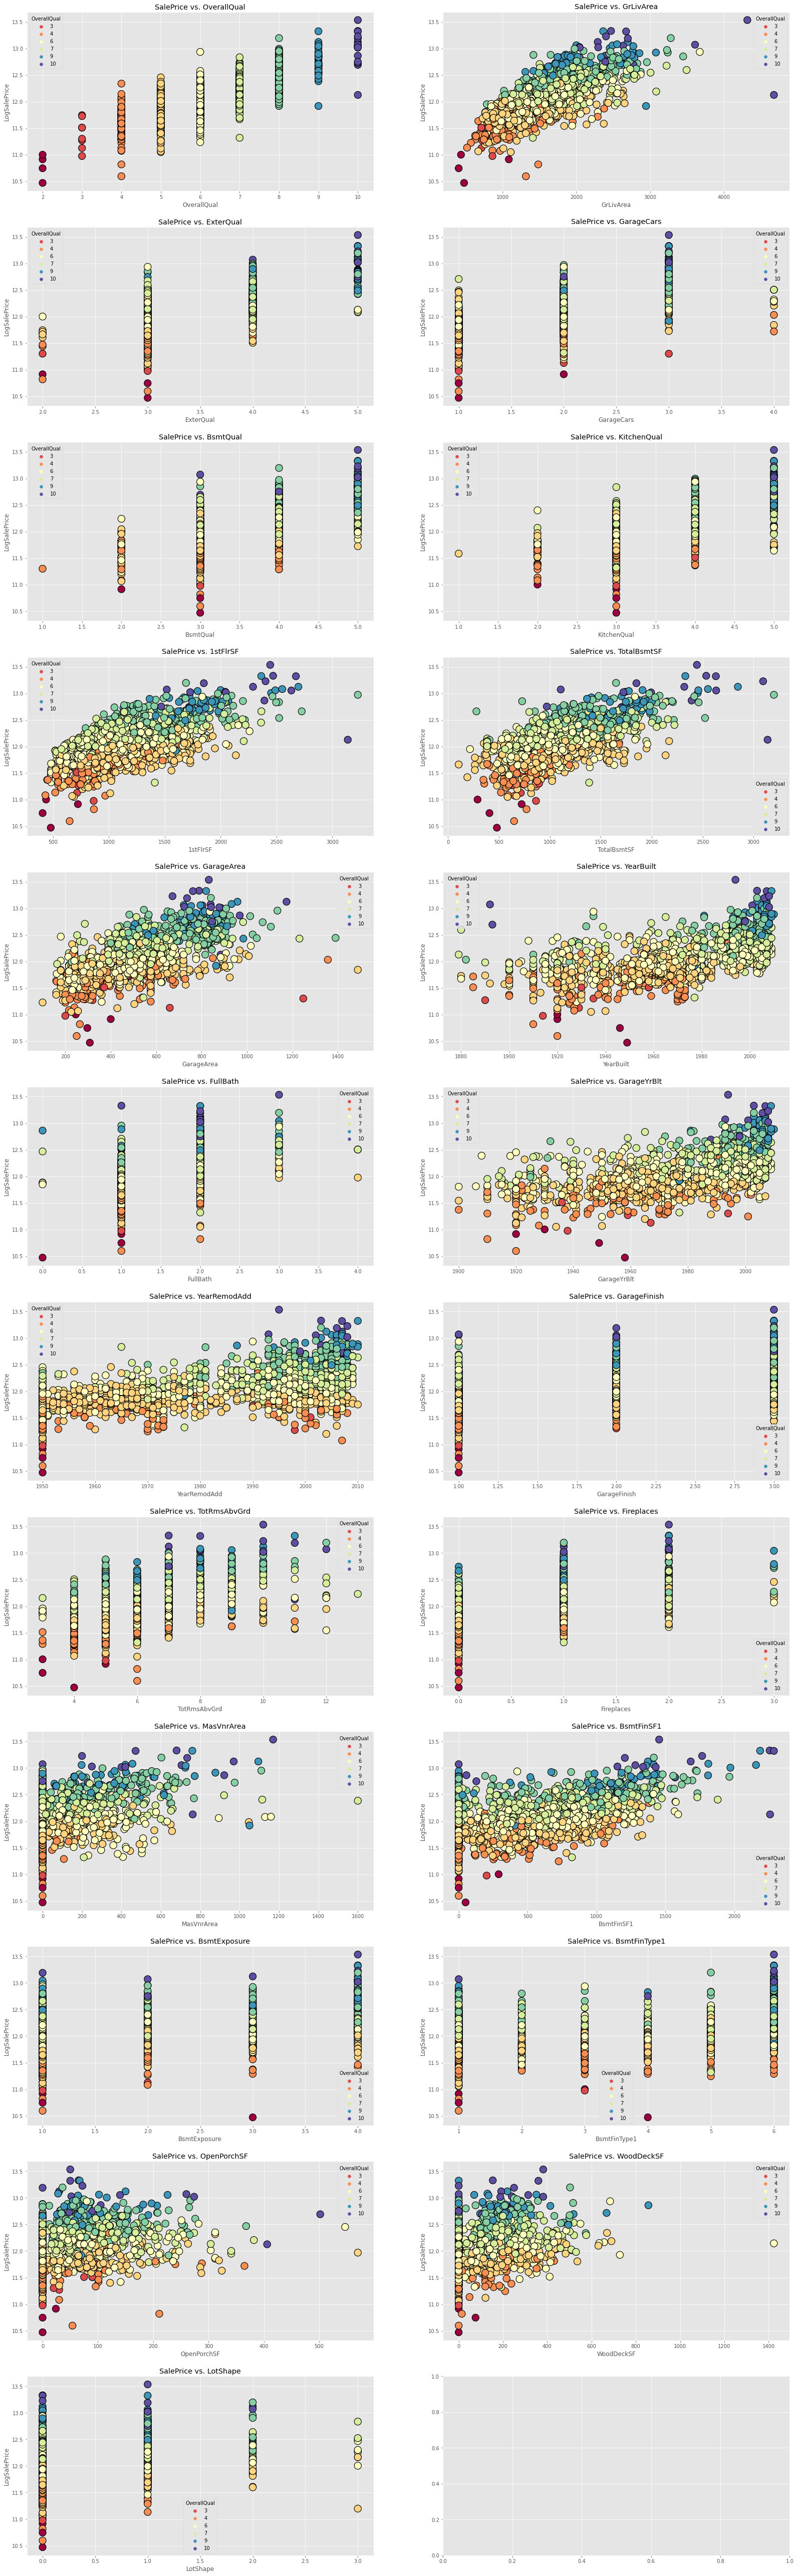

In [123]:
fig, axs = plt.subplots(12,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=1.3)
axs = axs.flatten()
for i, col in enumerate(list(sale_cors.index[2:25])):
    sns.scatterplot(y='LogSalePrice', x=col, s = 200,ax=axs[i],
                    hue = 'OverallQual',palette="Spectral",
                    edgecolor = 'black',data=train)
    axs[i].set_ylabel('LogSalePrice')
    axs[i].set_xlabel(col)
    axs[i].set_title(f'SalePrice vs. {col}')
plt.show()

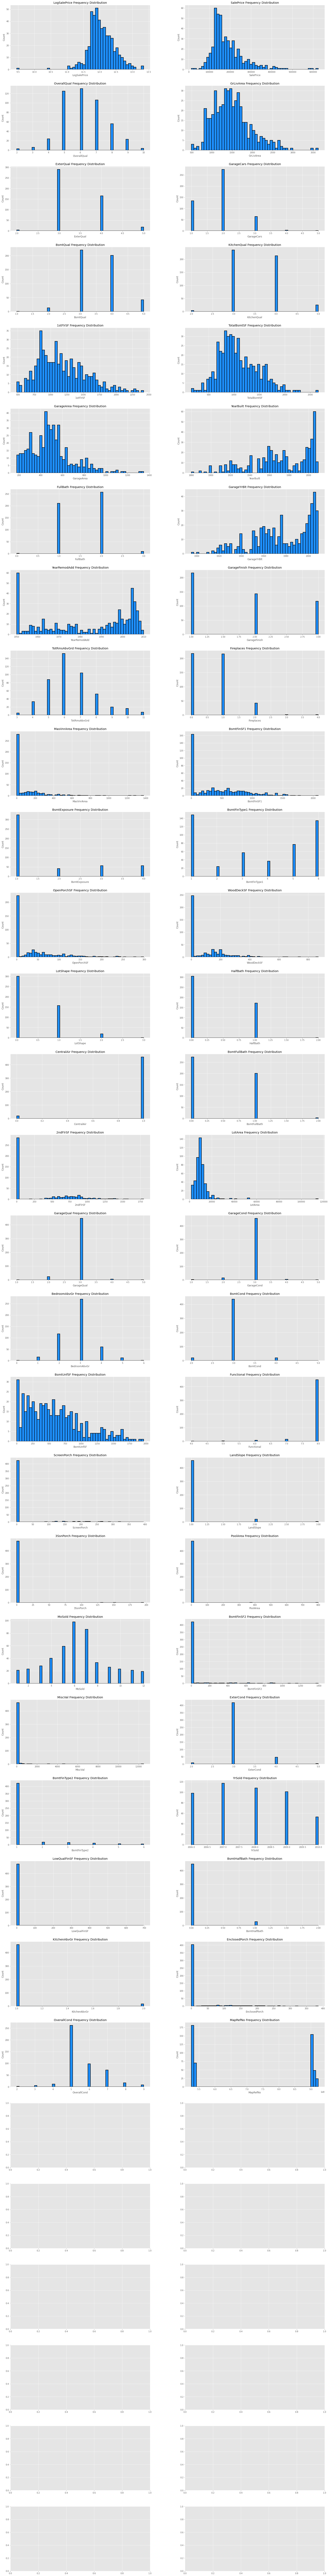

In [124]:
fig, axs = plt.subplots(32,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=3,wspace = .25,hspace = .25)
axs = axs.flatten()
for i, col in enumerate(list(sale_cors.index[:])):
    axs[i].hist(x=col,data=test,edgecolor = 'black',
                color = 'dodgerblue',linewidth = 2, bins = 50)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel(col)
    axs[i].set_title(f'{col} Frequency Distribution')

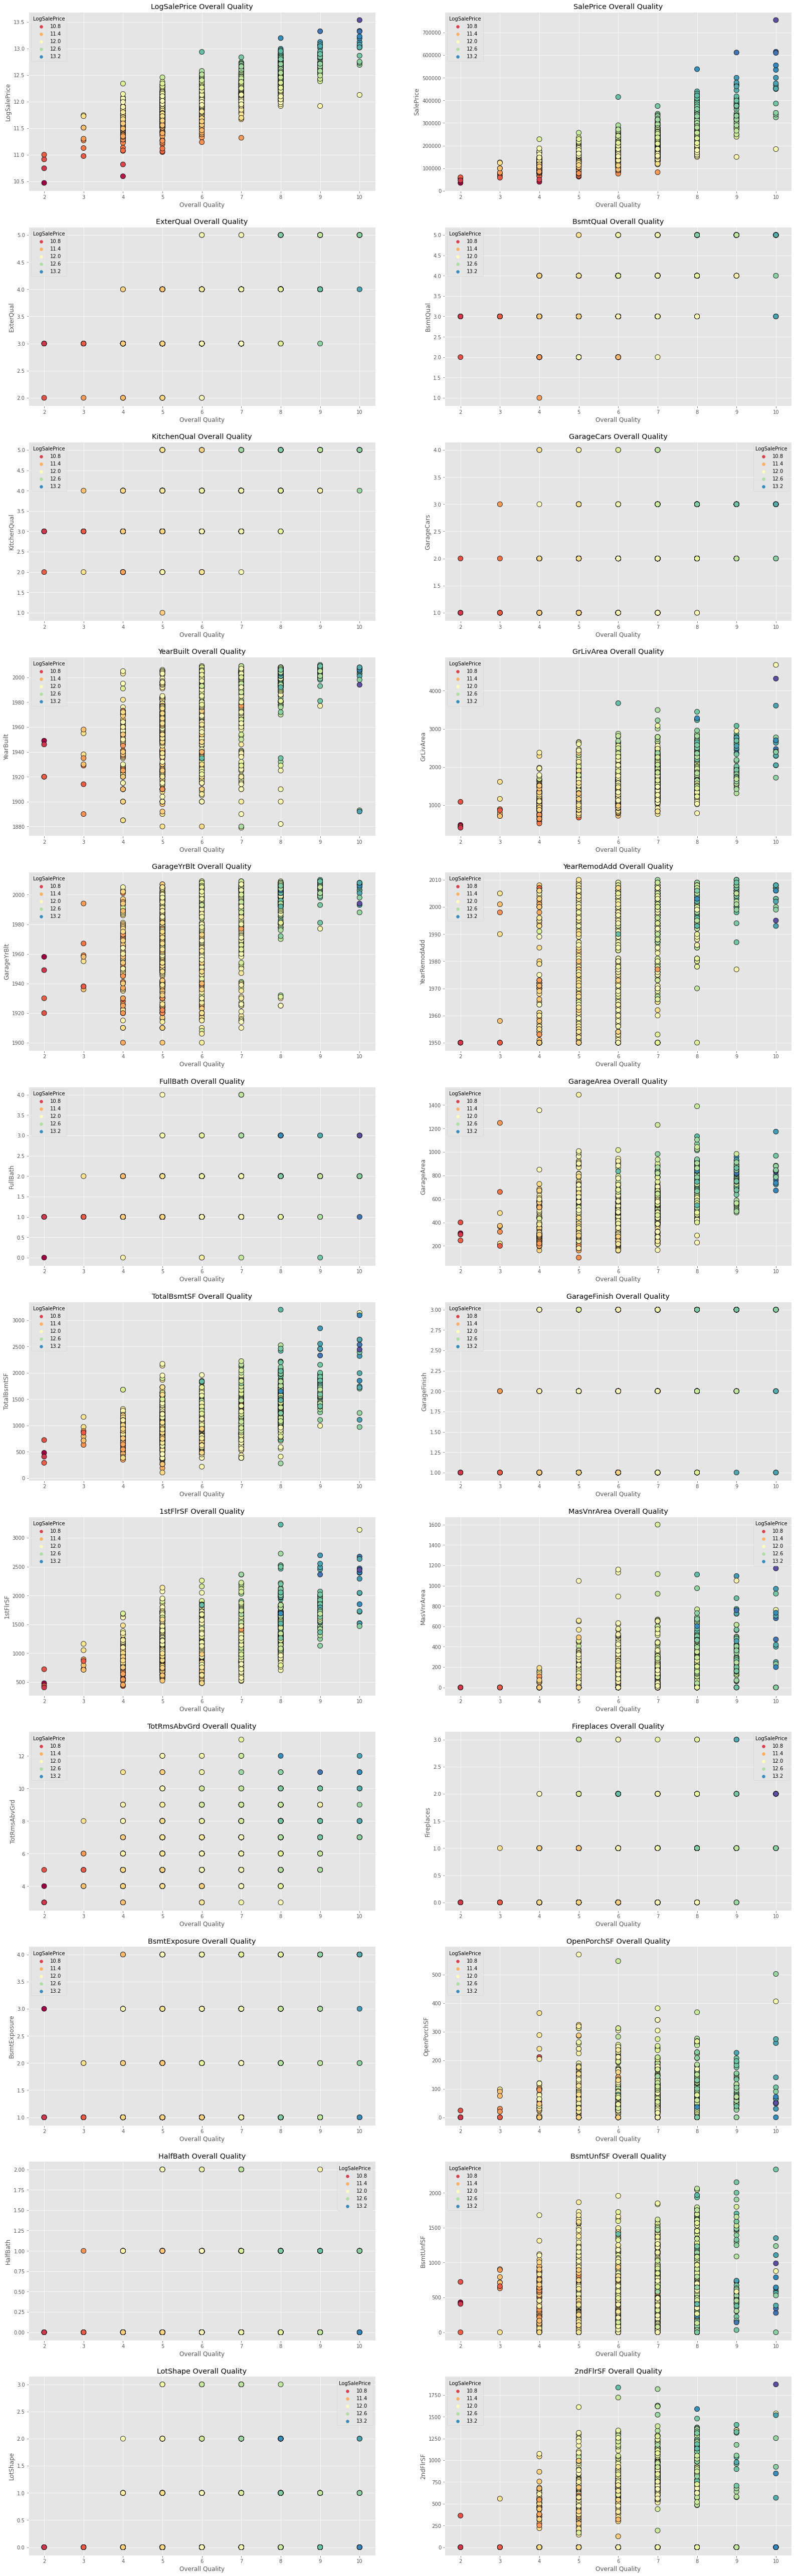

In [125]:
qual_cors = train_corr[['OverallQual']].sort_values(by = 'OverallQual', ascending = False)

fig, axs = plt.subplots(12,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=1.3)
axs = axs.flatten()
for i, col in enumerate(list(qual_cors.index[1:25])):
    sns.scatterplot(y=col, x='OverallQual',s=100 ,ax=axs[i],
                    hue = 'LogSalePrice',palette="Spectral",
                    edgecolor = 'black',data=train)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel('Overall Quality')
    axs[i].set_title(f'{col} Overall Quality')
plt.show()

# Boxplots vs. Overall Quality

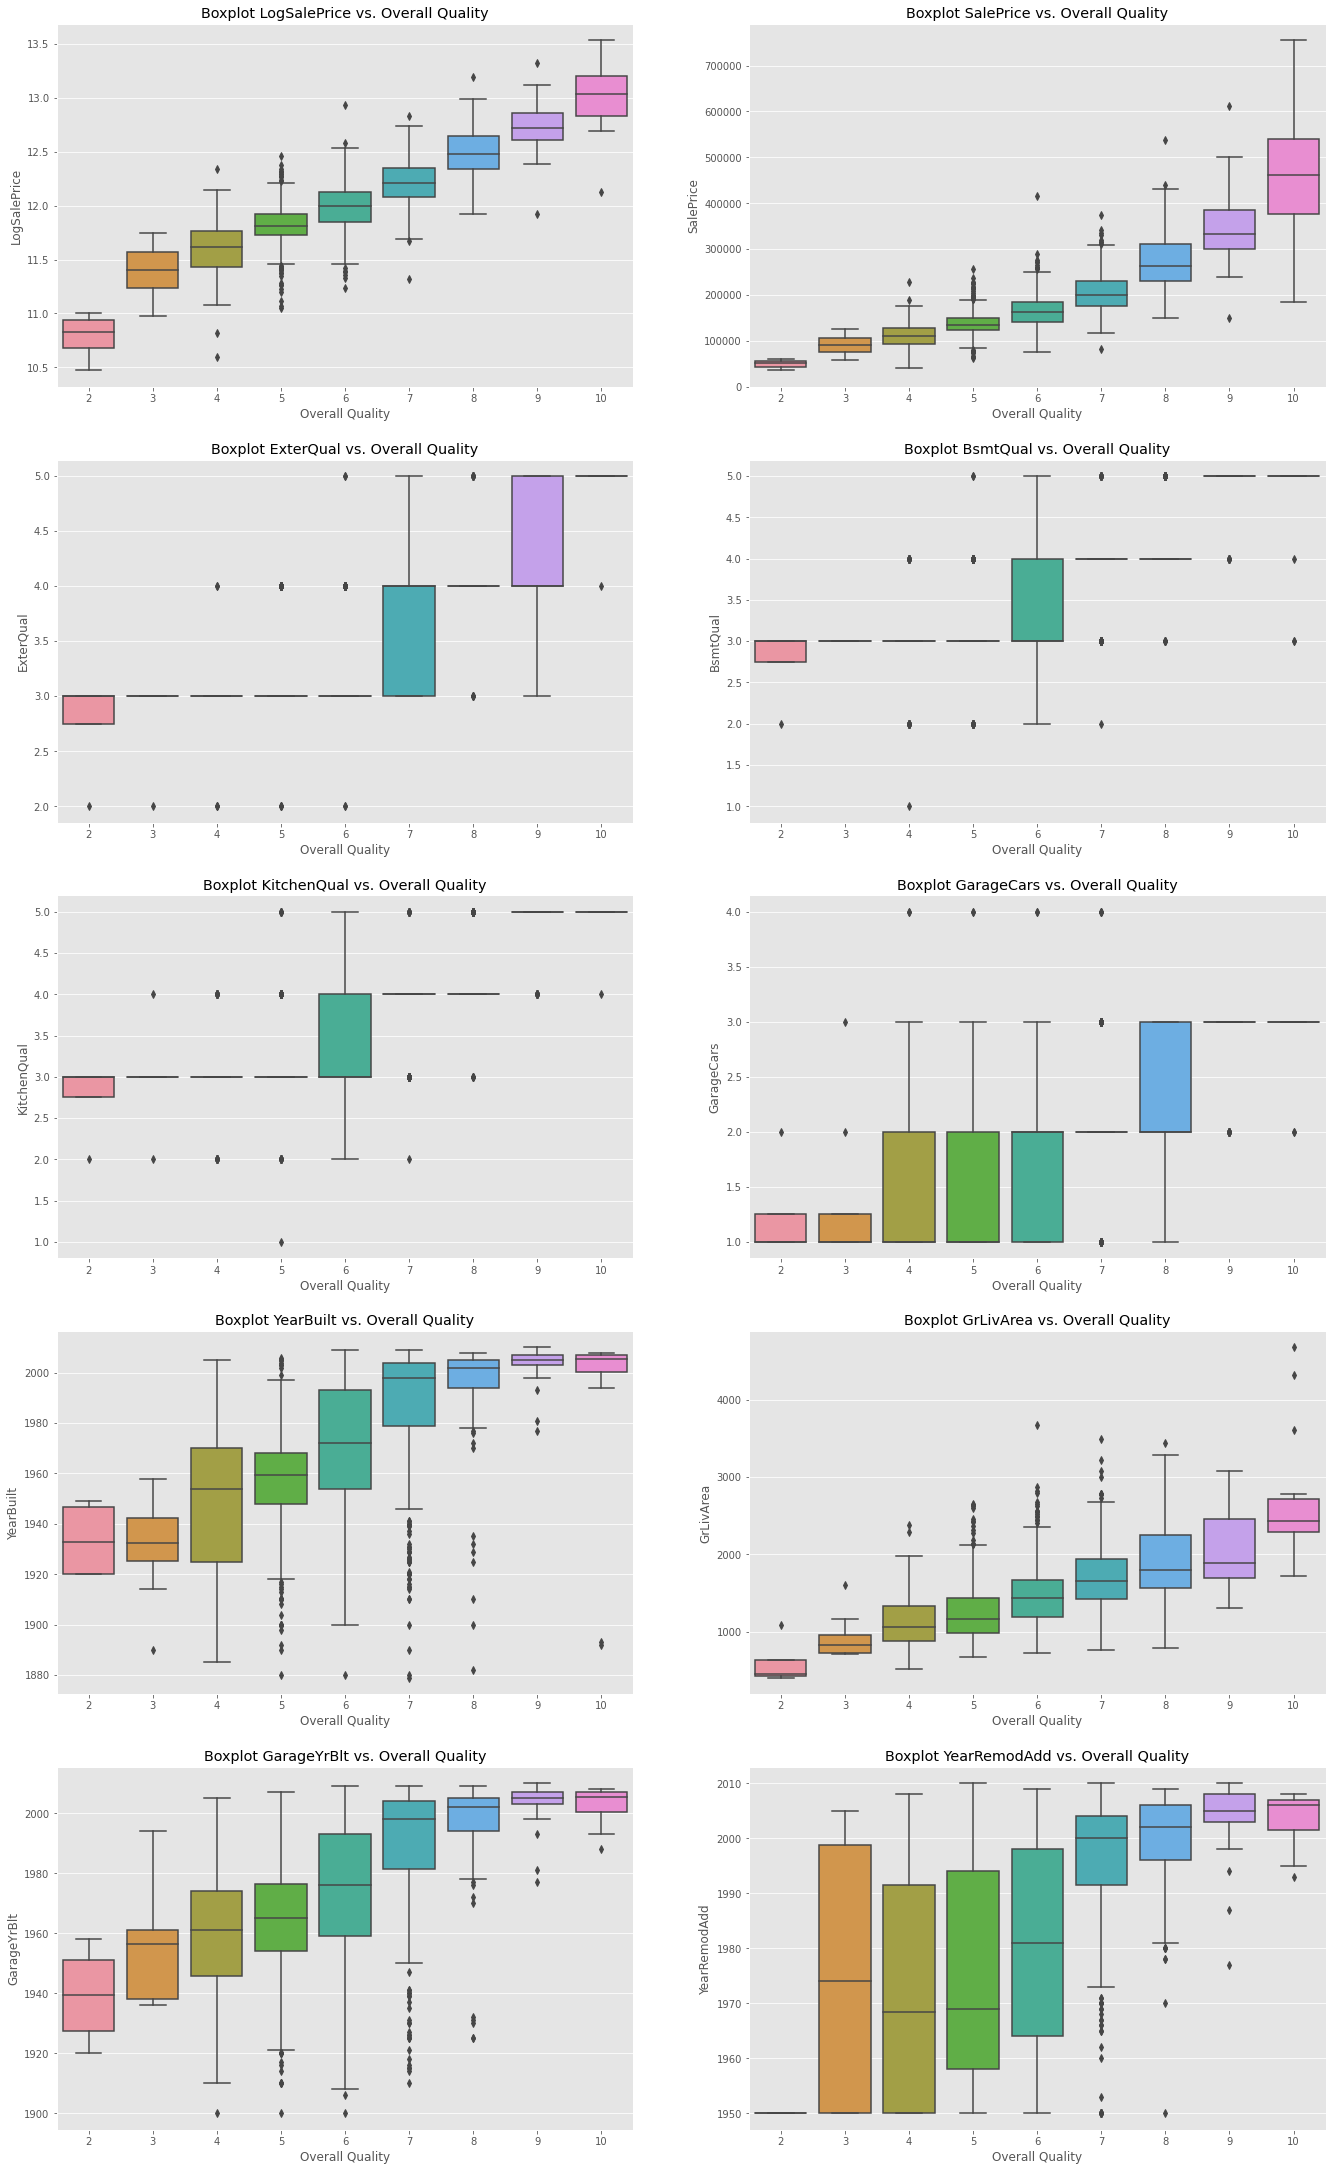

In [126]:
fig, axs = plt.subplots(int(np.ceil(len(qual_cors.index[1:11])/2)),2,figsize = (15,6))
plt.subplots_adjust(right=1.3, top=5)
axs = axs.flatten()
for i, col in enumerate(qual_cors.index[1:11]):
    sns.boxplot(x='OverallQual',y = col,ax=axs[i],data=train)
    axs[i].set_ylabel(f'{col}')
    axs[i].set_xlabel(f'Overall Quality')
    axs[i].set_title(f'Boxplot {col} vs. Overall Quality')
plt.show()

# Linear Model w/ Naive Feature Selection Based on Correlation w/ Sale Price Alone

In [114]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [115]:
train.head()

MapRefNo Neighborhood  GrLivArea                       MSSubClass  \
2467  535351050        NAmes       1363  1-STORY 1946 & NEWER ALL STYLES   
220   527325110       NWAmes       1969             2-STORY 1946 & NEWER   
1101  908208020      Edwards       1121  1-STORY 1946 & NEWER ALL STYLES   
58    528365060      NoRidge       2418             2-STORY 1946 & NEWER   
1330  905427070      Edwards       2108             2-STORY 1945 & OLDER   

     MSZoning  LotArea Street  LotShape LandContour Utilities LotConfig  \
2467       RL    14559   Pave         0         Lvl    AllPub    Inside   
220        RL    11952   Pave         0         Lvl    AllPub    Inside   
1101       RM     8546   Pave         0         Lvl    AllPub    Corner   
58         RL    10542   Pave         0         Lvl    AllPub    Inside   
1330       RL    13728   Pave         0         Lvl    AllPub    Corner   

      LandSlope Condition1 Condition2 BldgType HouseStyle  OverallQual  \
2467          1       Norm       Norm     1Fam     1Story            5   
220           1       PosA       Norm     1Fam     2Story            7   
1101          1       Norm       Norm     1Fam     1Story            4   
58            1       Norm       Norm     1Fam     2Story            7   
1330          1       Norm       Norm     1Fam     2Story            6   

      OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
2467            7       1951          2000       Hip  CompShg     Wd Sdng   
220             6       1977          1977   Mansard  WdShake     WdShing   
1101            5       2003          2004     Gable  CompShg     VinylSd   
58              5       1993          1994       Hip  CompShg     Wd Sdng   
1330            7       1935          1986       Hip  CompShg      Stucco   

     Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  \
2467     Wd Sdng     BrkCmn        70.0          4          3     CBlock   
220      Plywood       None         0.0          3          3     CBlock   
1101     VinylSd       None         0.0          3          3      PConc   
58       ImStucc    BrkFace       651.0          4          3      PConc   
1330      Stucco       None         0.0          3          3     CBlock   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
2467         3         3             1             4       650.0   
220          4         3             1             1         0.0   
1101         4         3             1             1         0.0   
58           4         3             4             6      1173.0   
1330         3         3             1             3       626.0   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
2467             3       180.0      178.0       1008.0    GasA        Ex   
220              1         0.0      808.0        808.0    GasA        TA   
1101             1         0.0     1121.0       1121.0    GasA        Ex   
58               1         0.0      138.0       1311.0    GasA        Ex   
1330             1         0.0      501.0       1127.0    GasA        Ex   

      CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
2467           1      SBrkr      1363         0             0           1.0   
220            1      SBrkr      1161       808             0           0.0   
1101           1      SBrkr      1121         0             0           0.0   
58             1      SBrkr      1325      1093             0           1.0   
1330           1      SBrkr      1236       872             0           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
2467           0.0         1         0             2             1   
220            0.0         2         1             3             1   
1101           0.0         2         0             2             1   
58             0.0         2         1             3             1   
1330           0.0         2         0     

Index(['TotalSF', 'OverallQual', 'GrLivArea', 'ExterQual', 'GarageCars',
       'BsmtQual'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1534.
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:57:20   Log-Likelihood:                 920.66
No. Observations:                1899   AIC:                            -1827.
Df Residuals:                    1892   BIC:                            -1788.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

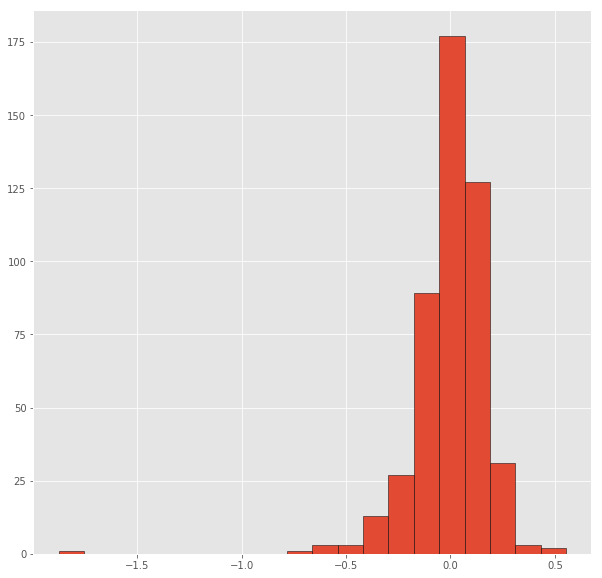

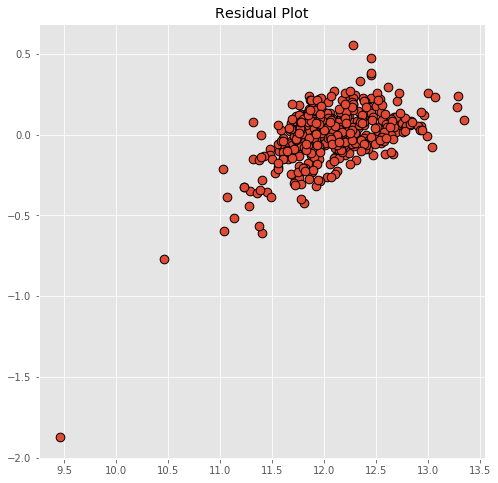

In [116]:
tr = train[sale_cors.index.to_numpy()[:8]]
ts = test[sale_cors.index.to_numpy()[:8]]

X_train = tr.drop(['LogSalePrice','SalePrice'], axis = 1)
X_test = ts.drop(['LogSalePrice','SalePrice'], axis = 1)
y_train = tr['LogSalePrice']
y_test = ts['LogSalePrice']

print(X_train.columns)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)

#################################################################### statsmodels
X_add_const = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_add_const)
results = model.fit()
print(results.summary())

###################################################################### sklearn

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

##################################################################### diagnostic plots

residuals = y_test - lm.predict(X_test_scaled)
residuals.hist(bins = 20,figsize = (10,10),edgecolor = 'black')

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
plt.scatter(x = y_test,y = residuals,edgecolors = 'black',linewidths = 1,s = 75)
plt.title('Residual Plot')
plt.show()

# Feature Selection with Lasso Regression:

In [117]:
from sklearn.linear_model import Lasso,Ridge,LassoLarsIC
from sklearn.model_selection import GridSearchCV

In [118]:
train.columns

Index(['MapRefNo', 'Neighborhood', 'GrLivArea', 'MSSubClass', 'MSZoning',
       'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', '

In [121]:
tr = train[sale_cors.index.to_numpy()[:]]


ts = test[sale_cors.index.to_numpy()[:]]

X_train = tr.drop(['LogSalePrice','SalePrice','Price/AuxSF','Price/SF'], axis = 1)
X_test = ts.drop(['LogSalePrice','SalePrice','Price/AuxSF','Price/SF'], axis = 1)
y_train = tr['SalePrice']
y_test = ts['SalePrice']

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)


lasso = Lasso()

alpha_range = np.linspace(0,1000,1000)
lasso.set_params(normalize=False)
coefs_lasso  = []
scores = []

for alpha in alpha_range:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train,y_train)  
        coefs_lasso.append(lasso.coef_)
        scores.append(lasso.score(X_test,y_test))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alpha_range, columns = X_train.columns)  
score_lasso = pd.DataFrame({'R^2':scores},index = alpha_range)


fig = px.line(coefs_lasso,x = coefs_lasso.index,
              y = coefs_lasso.columns,title = "Lasso Coefs vs. Lambda",
              range_x=(0,1000),height = 800,width = 1000)
fig.show()

fig = px.line(score_lasso,x = score_lasso.index,
              y = score_lasso['R^2'],title = "Lasso R^2 vs. Lambda",
              range_x=(0,1000),height = 800,width = 1000)
fig.show()

In [ ]:
tr = train[sale_cors.index.to_numpy()[:]][['SalePrice','TotalSF','GarageArea'
                                           ,'FullBath','YearBuilt','TotRmsAbvGrd',
                                          'YearRemodAdd','BsmtFinSF1','BedroomAbvGr','relativeAuxSF']]
ts = test[sale_cors.index.to_numpy()[:]][['SalePrice','TotalSF','GarageArea',
                                          'FullBath','YearBuilt','TotRmsAbvGrd',
                                         'YearRemodAdd','BsmtFinSF1','BedroomAbvGr','relativeAuxSF']]

X_train = tr.drop(['SalePrice'], axis = 1)
X_test = ts.drop(['SalePrice'], axis = 1)
y_train = tr['SalePrice']
y_test = ts['SalePrice']

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)


ridge = Ridge()

alpha_range = np.linspace(0,10000,10000)
lasso.set_params(normalize=True
                )
coefs_ridge  = []
scores = []

for alpha in alpha_range:
        ridge.set_params(alpha=alpha)
        ridge.fit(X_train_scaled,y_train)  
        coefs_ridge.append(ridge.coef_)
        scores.append(ridge.score(X_test_scaled,y_test))

coefs_ridge = pd.DataFrame(coefs_ridge, index = alpha_range, columns = X_train.columns)  
score_ridge = pd.DataFrame({'R^2':scores},index = alpha_range)


fig = px.line(coefs_ridge,x = coefs_ridge.index,
              y = coefs_ridge.columns,title = "Ridge Coefs vs. Lambda",
              range_x=(0,300),height = 800,width = 1000)
fig.show()

fig = px.line(score_ridge,x = score_ridge.index,
              y = score_ridge['R^2'],title = "Ridge R^2 vs. Lambda",
              range_x=(0,300),height = 800,width = 1000)
fig.show()